Estimation of Pi using quantum algorithm

In [1]:
from IPython.display import clear_output
from qiskit import *
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plotter
#from qiskit.tools.monitor import job_monitor
# Visualisation settings
import seaborn as sns, operator
sns.set_style("dark")

pi = np.pi

In [2]:
# Quantum inverse fourier transform 

def qft_dagger(circ_, n_qubits):
    """n-qubit QFTdagger the first n qubits in circ"""
    for qubit in range(int(n_qubits/2)):
        circ_.swap(qubit, n_qubits-qubit-1)
    for j in range(0,n_qubits):
        for m in range(j):
            circ_.cp(-np.pi/float(2**(j-m)), m, j)
        circ_.h(j)

In [3]:
# Quantum phase estimation 

def qpe_pre(circ_, n_qubits):
    circ_.h(range(n_qubits))
    circ_.x(n_qubits)

    for x in reversed(range(n_qubits)):
        for _ in range(2**(n_qubits-1-x)):
            circ_.cp(1, n_qubits-1-x, n_qubits)

In [4]:
def run_job(circ, backend, shots=1000, optimization_level=0):
    t_circ = transpile(circ, backend, optimization_level=optimization_level)
    qobj = assemble(t_circ, shots=shots)
    job = backend.run(qobj)
    job_monitor(job)
    return job.result().get_counts()

In [5]:
def get_pi_estimate(n_qubits):

    # create the circuit
    circ = QuantumCircuit(n_qubits + 1, n_qubits)
    # create the input state
    qpe_pre(circ, n_qubits)
    # apply a barrier
    circ.barrier()
    # apply the inverse fourier transform
    qft_dagger(circ, n_qubits)
    # apply  a barrier
    circ.barrier()
    # measure all but the last qubits
    circ.measure(range(n_qubits), range(n_qubits))

    # run the job and get the results
    counts = run_job(circ, backend=simulator, shots=10000, optimization_level=0)
    # print(counts) 

    # get the count that occurred most frequently
    max_counts_result = max(counts, key=counts.get)
    max_counts_result = int(max_counts_result, 2)
    
    # solve for pi from the measured counts
    theta = max_counts_result/2**n_qubits
    return (1./(2*theta))

In [6]:
from qiskit import IBMQ

my_provider = IBMQ.load_account()
simulator_cloud = my_provider.get_backend('ibmq_qasm_simulator')
device = my_provider.get_backend('ibmq_16_melbourne')

ImportError: cannot import name 'IBMQ' from 'qiskit' (/Users/thiru/anaconda3/envs/qiskit/lib/python3.12/site-packages/qiskit/__init__.py)

In [ ]:
simulator = Aer.get_backend('aer_simulator')


In [ ]:
nqs = list(range(2,12+1))
pi_estimates = []
for nq in nqs:
    thisnq_pi_estimate = get_pi_estimate(nq)
    pi_estimates.append(thisnq_pi_estimate)
    print(f"{nq} qubits, pi ≈ {thisnq_pi_estimate}")

NameError: name 'simulator' is not defined

<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:5: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
/var/folders/7s/l5bdfv5d5g16p89ftt6w1_980000gn/T/ipykernel_8866/4112956056.py:5: SyntaxWarning: invalid escape sequence '\p'
  plotter.legend(['$\pi$', 'estimate of $\pi$'])
/var/folders/7s/l5bdfv5d5g16p89ftt6w1_980000gn/T/ipykernel_8866/4112956056.py:5: SyntaxWarning: invalid escape sequence '\p'
  plotter.legend(['$\pi$', 'estimate of $\pi$'])
/var/folders/7s/l5bdfv5d5g16p89ftt6w1_980000gn/T/ipykernel_8866/4112956056.py:7: SyntaxWarning: invalid escape sequence '\p'
  plotter.ylabel('$\pi$ and estimate of $\pi$', fontdict={'size':20})
/var/folders/7s/l5bdfv5d5g16p89ftt6w1_980000gn/T/ipykernel_8866/4112956056.py:5: SyntaxWarning: invalid escape sequence '\p'
  plotter.legend(['$\pi$', 'esti

ValueError: x and y must have same first dimension, but have shapes (11,) and (0,)

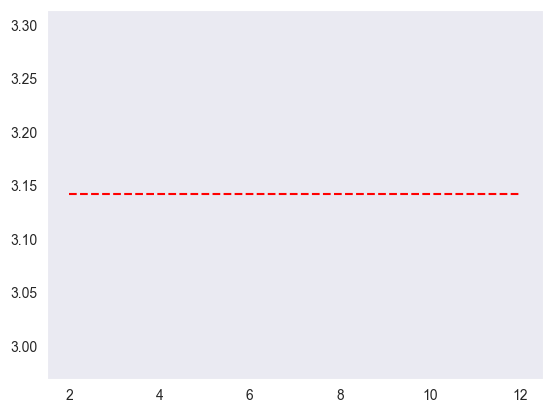

In [ ]:
plotter.plot(nqs, [pi]*len(nqs), '--r')
plotter.plot(nqs, pi_estimates, '.-', markersize=12)
plotter.xlim([1.5, 12.5])
plotter.ylim([1.5, 4.5])
plotter.legend(['$\pi$', 'estimate of $\pi$'])
plotter.xlabel('Number of qubits', fontdict={'size':20})
plotter.ylabel('$\pi$ and estimate of $\pi$', fontdict={'size':20})
plotter.tick_params(axis='x', labelsize=12)
plotter.tick_params(axis='y', labelsize=12)
plotter.show()